## 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!


### (1) 데이터 가져오기
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.


In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [2]:
df_X = diabetes.data
df_y = diabetes.target

### (2) 모델에 입력할 데이터 X 준비하기
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [3]:
import numpy as np

X = np.array(df_X)
X.shape

(442, 10)

### (3) 모델에 예측할 데이터 y 준비하기
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [4]:
y = np.array(df_y)

### (4) train 데이터와 test 데이터로 분리하기
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f"전체 학습 데이터: {X.shape} 레이블: {y.shape}")
print(f"학습 데이터: {X_train.shape} 레이블: {y_train.shape}")
print(f"테스트 데이터: {X_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (442, 10) 레이블: (442,)
학습 데이터: (353, 10) 레이블: (353,)
테스트 데이터: (89, 10) 레이블: (89,)


### (5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [6]:
def model(X, y, epochs, learning_rate):
    losses, weight_history, bias_history = [], [], []
    
    W = np.ones(shape=(X.shape[1],))
    b = 0
    
    for epoch in range(epochs):
        y_pred = X.dot(W) + b
        l = loss(y, y_pred)
        w_grad, b_grad = gradient(X, y, y_pred)
        W -= learning_rate * w_grad 
        b -= learning_rate * b_grad
        print(f'epoch {epoch + 1}, loss: {l}')
        
        losses.append(l)
        weight_history.append(W.copy())
        bias_history.append(b)
    
    return W, b, losses, weight_history, bias_history

### (6) 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [7]:
def loss(y, y_pred):
    return ((y_pred - y) ** 2).mean()

### (7) 기울기를 구하는 gradient 함수 구현하기
- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [8]:
def gradient(x, y, y_pred):
    error = y_pred - y
    w_grad = 2 * np.dot(x.T, error) / len(y)
    b_grad = 2 * error.mean()
    return w_grad, b_grad

### (8) 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.


In [9]:
learning_rate = 0.8

### (9) 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.


In [10]:
epochs = 10000

In [11]:
W, b, losses, weight_history, bias_history = model(X_train, y_train, epochs, learning_rate)

epoch 1, loss: 29051.841096506516
epoch 2, loss: 14120.300194758489
epoch 3, loss: 8707.242806539707
epoch 4, loss: 6721.922181161203
epoch 5, loss: 5971.583157393518
epoch 6, loss: 5666.7854856084505
epoch 7, loss: 5523.296449139636
epoch 8, loss: 5438.763633974172
epoch 9, loss: 5376.314024648858
epoch 10, loss: 5322.648548269363
epoch 11, loss: 5272.955689735181
epoch 12, loss: 5225.48022856514
epoch 13, loss: 5179.567912039961
epoch 14, loss: 5134.961499113496
epoch 15, loss: 5091.547310298781
epoch 16, loss: 5049.263964561347
epoch 17, loss: 5008.069505629812
epoch 18, loss: 4967.929549586896
epoch 19, loss: 4928.813000840064
epoch 20, loss: 4890.69049328409
epoch 21, loss: 4853.533813047025
epoch 22, loss: 4817.3156750894495
epoch 23, loss: 4782.009627654202
epoch 24, loss: 4747.590003189836
epoch 25, loss: 4714.031886438216
epoch 26, loss: 4681.311089121711
epoch 27, loss: 4649.4041274142555
epoch 28, loss: 4618.288200810515
epoch 29, loss: 4587.941171882577
epoch 30, loss: 4558

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 시각화

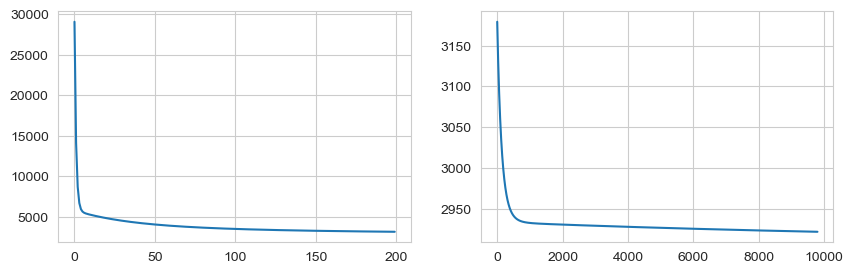

In [13]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(losses[:200])

plt.subplot(1, 2, 2)
plt.plot(losses[200:])

- 200 epoch 동안 30000에서 5000까지 떨어지고 200 epoch 이후에는 3150에서 2900대로 떨어진 것을 볼 수 있다
- epoch을 아무리 늘려도 2000정도 이후부터는 크게 줄어들지 않았다

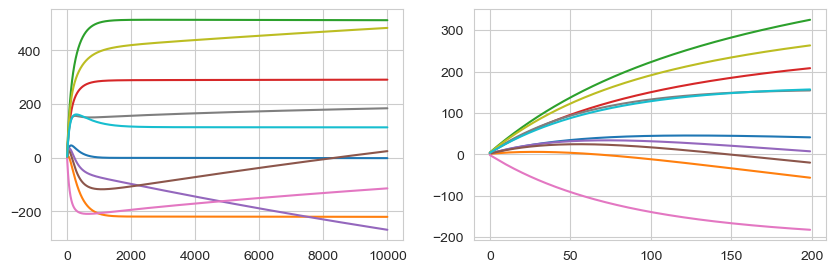

In [14]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(weight_history)

plt.subplot(1, 2, 2)
plt.plot(weight_history[:200])

- weight도 하나의 값으로 수렴하고 있음을 알 수 있다 

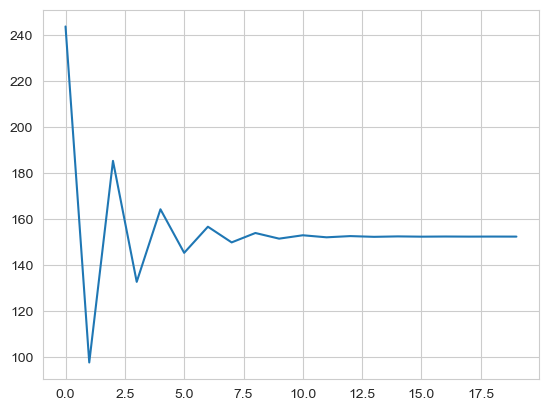

In [15]:
plt.plot(bias_history[:20])

bias도 상당히 빠른 시간에 수렴을 하였다

In [16]:
W

array([  -1.83702303, -220.69745663,  512.38961556,  290.69401181,
       -268.91871883,   24.25870931, -114.51374486,  184.0835115 ,
        483.64524744,  112.95099149])

- 0에 가까운 feature를 제거하는 것도 고려해볼 수 있을 것 같다

loss, weight, bias 값들의 변화를 확인해본 결과
- 선형회귀 모델이 정보를 담아내는데에 한계가 있을 것이라는 판단이 되었다.

- 하지만 모델은 바꾸지 않는 하에서 최대치의 성능을 내는 것이 이번 프로젝트의 목적이였기에 데이터를 변형하고 feature engineering에 집중하고자 하였다.

## 데이터 분석 및 시각화 (EDA)

In [17]:
train = pd.DataFrame(X_train)
train['label'] = y_train
train.describe()

,0,1,2,3,4,5,6,7,8,9,label
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,-0.000400,0.000454,0.000026,0.000032,-0.001101,-0.000920,-0.000833,0.000294,-0.000194,0.001304,152.427762
std,0.047321,0.047659,0.048204,0.047737,0.048380,0.048093,0.049006,0.048587,0.047991,0.048870,76.502793
min,-0.107226,-0.044642,-0.090275,-0.112399,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767,25.000000
25%,-0.038207,-0.044642,-0.035307,-0.036656,-0.034592,-0.032002,-0.036038,-0.039493,-0.033246,-0.030072,88.000000
50%,0.005383,-0.044642,-0.007284,-0.005670,-0.004321,-0.004132,-0.006584,-0.002592,-0.003301,-0.001078,141.000000
75%,0.038076,0.050680,0.033673,0.034508,0.027326,0.027496,0.026550,0.034309,0.031193,0.027917,209.000000
max,0.110727,0.050680,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133597,0.135612,346.000000


- min max scaling이 필요해보인다

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_minmax = scaler.transform(X_train)
# scaler.transform(X_test)

X_train_minmax = pd.DataFrame(X_train_minmax)

In [19]:
X_train_minmax

,0,1,2,3,4,5,6,7,8,9
0,0.783333,1.0,0.247934,0.507042,0.681373,0.521912,0.467532,0.282087,0.633402,0.575758
1,0.666667,1.0,0.276860,0.732394,0.269608,0.314741,0.090909,0.423131,0.439749,0.454545
2,0.100000,1.0,0.260331,0.464789,0.318627,0.283865,0.415584,0.141044,0.207800,0.439394
3,0.566667,0.0,0.252066,0.605634,0.426471,0.357570,0.311688,0.282087,0.545509,0.560606
4,0.616667,0.0,0.537190,0.234789,0.441176,0.497012,0.155844,0.493653,0.281617,0.484848
...,...,...,...,...,...,...,...,...,...,...
348,0.316667,1.0,0.619835,0.225352,1.000000,0.863546,0.363636,0.566996,0.679174,0.757576
349,0.500000,1.0,0.326446,0.408451,0.397059,0.323705,0.389610,0.141044,0.462143,0.257576
350,0.600000,1.0,0.582645,0.713662,0.539216,0.252988,0.038961,0.885755,0.999228,0.803030
351,0.716667,0.0,0.578512,0.366197,0.367647,0.136454,0.207792,0.282087,0.886553,0.636364


- 1번 피처가 알고보니 두 가지 범주로 분류되는 피처였다

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: >, <Axes: >]], dtype=object)

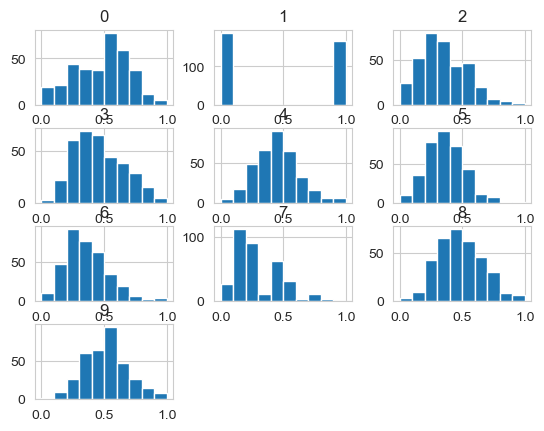

In [20]:
X_train_minmax.hist()

-  대부분 거의 정규분포의 형태를 띄고 있는 것을 볼 수 있다.

## label 분포

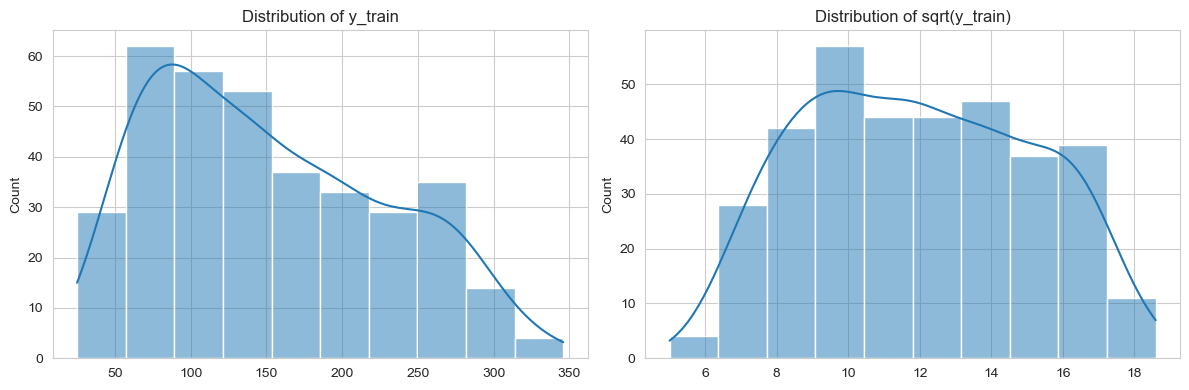

In [21]:
plt.figure(figsize=(12, 4))

# 첫 번째 subplot
ax1 = plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, ax=ax1)
ax1.set_title('Distribution of y_train')

# 두 번째 subplot
ax2 = plt.subplot(1, 2, 2)
sns.histplot(np.sqrt(y_train), kde=True, ax=ax2)
ax2.set_title('Distribution of sqrt(y_train)')

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()

- 레이블의 경우는 살짝 왼쪽으로 치우쳐 보여서 root scaling을 진행해보았다.
- log scaling을 해보니 반대로 우로 치우치게 되어서 root scaling을 하였다.

<Axes: >

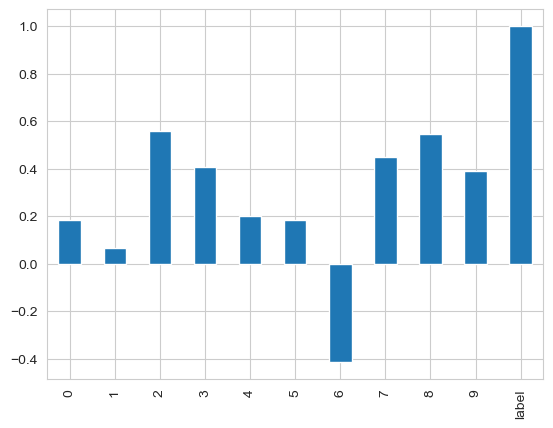

In [46]:
train_minmax = pd.DataFrame(X_train_minmax)
train_minmax['label'] = y_train

corr_matrix = train_minmax.corr()
corr_matrix.label.plot(kind='bar')

- 0번째와 1번째 feature는 상관관계가 상당히 낮다

In [24]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9,label
0,1.000000,0.170053,0.166820,0.315769,0.247185,0.211804,-0.078083,0.197723,0.269307,0.306929,0.180484
1,0.170053,1.000000,0.101692,0.208883,0.009410,0.129479,-0.406765,0.330333,0.154159,0.217182,0.064287
2,0.166820,0.101692,1.000000,0.375688,0.232119,0.251748,-0.371505,0.416041,0.433419,0.386247,0.576410
3,0.315769,0.208883,0.375688,1.000000,0.218905,0.170811,-0.173351,0.239815,0.360318,0.399868,0.417936
4,0.247185,0.009410,0.232119,0.218905,1.000000,0.896534,0.063389,0.542869,0.518178,0.329212,0.193313
5,0.211804,0.129479,0.251748,0.170811,0.896534,1.000000,-0.186829,0.657048,0.327432,0.302766,0.171212
6,-0.078083,-0.406765,-0.371505,-0.173351,0.063389,-0.186829,1.000000,-0.732941,-0.400858,-0.285059,-0.408841
7,0.197723,0.330333,0.416041,0.239815,0.542869,0.657048,-0.732941,1.000000,0.640526,0.425158,0.445985
8,0.269307,0.154159,0.433419,0.360318,0.518178,0.327432,-0.400858,0.640526,1.000000,0.468722,0.543337
9,0.306929,0.217182,0.386247,0.399868,0.329212,0.302766,-0.285059,0.425158,0.468722,1.000000,0.400623


In [25]:
corr_with_target = corr_matrix['label'].drop('label')

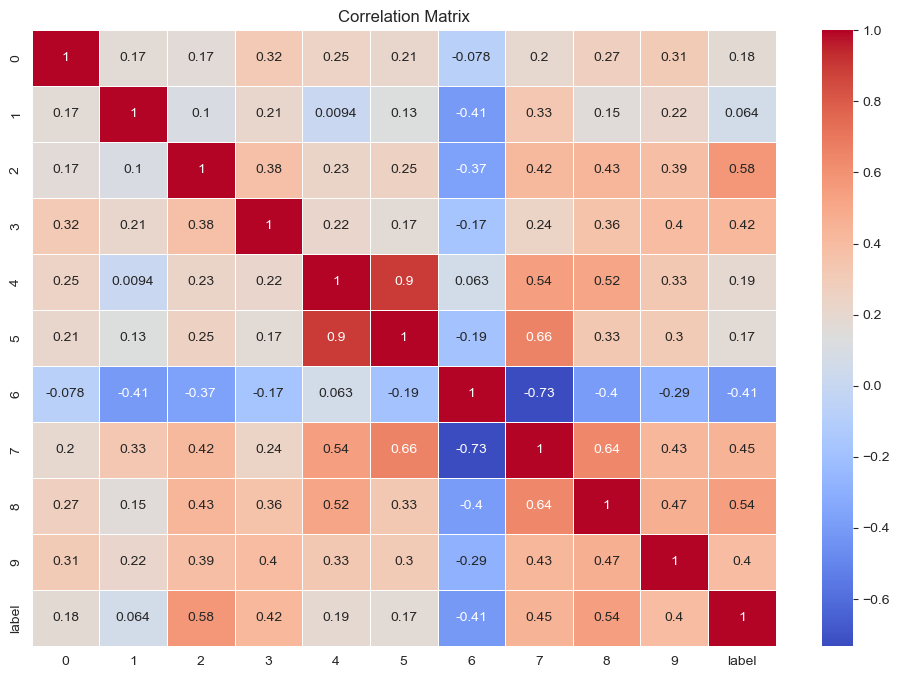

In [26]:
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

- 4번, 5번의 상관관계가 높고, 6번, 7번, 8번 데이터의 상관관계가 상당히 높다

In [27]:
print('Correlation with target:\n', corr_with_target)

Correlation with target:
 0    0.180484
1    0.064287
2    0.576410
3    0.417936
4    0.193313
5    0.171212
6   -0.408841
7    0.445985
8    0.543337
9    0.400623
Name: label, dtype: float64


### 상관관계를 활용한 피처 선택
- 상관관계가 높지 않은 피처(상관계수가 -0.1 < r < 0.1처럼 타깃과의 상관관계가 매우 낮은 피처)는 예측에 도움이 되지 않을 수 있다.
- 이를 제거하거나 다른 피처와 조합하는 피처 엔지니어링을 고려할 수 있다

- **높은 상관관계**: 타깃과 높은 상관관계를 가진 피처가 중요한 피처일 가능성이 높음.
- **낮은 상관관계**: 타깃과의 상관관계가 낮은 피처는 모델에 큰 영향을 미치지 못할 수 있음.
- **피처 간 상관관계가 높은 경우**: 다중공선성(multicollinearity) 문제를 유발할 수 있으므로 주의. 다중공선성 문제가 있으면, 모델의 해석력이 떨어지고 예측 불안성이 커질 수 있음.

### 피처 엔지니어링 및 선택

상관관계를 고려하여 모델에 사용할 피처를 선택하거나 새로운 피처를 만들 수 있다.

#### 방법
1. **피처 제거**: 타깃과의 상관관계가 너무 낮거나 피처 간 상관관계가 너무 높은 피처들을 제거할 수 있다.
2. **피처 결합**: 상관관계가 높은 피처들을 결합하여 새로운 파생 피처를 만들 수 있다.
3. **차원 축소**: PCA(주성분 분석)를 사용하여 차원을 축소. 상관관계가 높은 피처들을 하나의 주성분으로 모아 모델의 효율성을 높임.



In [28]:
threshold = 0.1
low_corr_features = corr_with_target[abs(corr_with_target) < threshold].index
data_reduced = train_minmax.drop(columns=low_corr_features)

# 높은 상관관계 피처 확인
high_corr_pairs = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]

print('Highly correlated pairs:\n', high_corr_pairs)

Highly correlated pairs:
    level_0 level_1         0
5        4       5  0.896534
6        5       4  0.896534
9        6       7 -0.732941
10       7       6 -0.732941


In [29]:
data_reduced

,0,2,3,4,5,6,7,8,9,label
0,0.783333,0.247934,0.507042,0.681373,0.521912,0.467532,0.282087,0.633402,0.575758,170.0
1,0.666667,0.276860,0.732394,0.269608,0.314741,0.090909,0.423131,0.439749,0.454545,77.0
2,0.100000,0.260331,0.464789,0.318627,0.283865,0.415584,0.141044,0.207800,0.439394,49.0
3,0.566667,0.252066,0.605634,0.426471,0.357570,0.311688,0.282087,0.545509,0.560606,66.0
4,0.616667,0.537190,0.234789,0.441176,0.497012,0.155844,0.493653,0.281617,0.484848,144.0
...,...,...,...,...,...,...,...,...,...,...
348,0.316667,0.619835,0.225352,1.000000,0.863546,0.363636,0.566996,0.679174,0.757576,220.0
349,0.500000,0.326446,0.408451,0.397059,0.323705,0.389610,0.141044,0.462143,0.257576,92.0
350,0.600000,0.582645,0.713662,0.539216,0.252988,0.038961,0.885755,0.999228,0.803030,242.0
351,0.716667,0.578512,0.366197,0.367647,0.136454,0.207792,0.282087,0.886553,0.636364,132.0


### 4,5번 피처 pca

In [30]:
from sklearn.decomposition import PCA

# PCA 적용
pca = PCA(n_components=1)

X_pca_45 = pca.fit_transform(data_reduced[[4,5]])
data_reduced.drop([4,5], axis=1, inplace=True)
data_reduced['pca_45'] = X_pca_45

### 6,7,8번 피처
- 6번 피처와 7번 피처가 상관관계가 있고 7번 피처와 8번 피처가 상관관계가 있으므로 7번 피처를 제거한다

In [31]:
data_reduced = data_reduced.drop(7, axis=1)

In [32]:
data_reduced.corr()['label'].drop('label')

0         0.180484
2         0.576410
3         0.417936
6        -0.408841
8         0.543337
9         0.400623
pca_45    0.188512
Name: label, dtype: float64

In [33]:
data_reduced.head()

,0,2,3,6,8,9,label,pca_45
0,0.783333,0.247934,0.507042,0.467532,0.633402,0.575758,170.0,0.279273
1,0.666667,0.276860,0.732394,0.090909,0.439749,0.454545,77.0,-0.167007
2,0.100000,0.260331,0.464789,0.415584,0.207800,0.439394,49.0,-0.150461
3,0.566667,0.252066,0.605634,0.311688,0.545509,0.560606,66.0,-0.020770
4,0.616667,0.537190,0.234789,0.155844,0.281617,0.484848,144.0,0.082144


### 최종 모델 학습

In [34]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.drop([1, 7], axis=1, inplace=True)

In [35]:
X_pca_45 = pca.fit_transform(X_test[[4,5]])
X_test.drop([4,5], axis=1, inplace=True)
X_test['pca_45'] = X_pca_45

In [36]:
y_train = np.sqrt(y_train)

In [37]:
X_train_scaled = np.array(data_reduced.drop(['label'], axis=1))
y_train_scaled = np.array(y_train)

In [38]:
X_train_scaled

array([[ 0.78333333,  0.24793388,  0.50704225, ...,  0.63340237,
         0.57575758,  0.27927349],
       [ 0.66666667,  0.2768595 ,  0.73239437, ...,  0.43974867,
         0.45454545, -0.16700681],
       [ 0.1       ,  0.26033058,  0.46478873, ...,  0.2077995 ,
         0.43939394, -0.15046135],
       ...,
       [ 0.6       ,  0.58264463,  0.71366197, ...,  0.99922777,
         0.8030303 , -0.00482427],
       [ 0.71666667,  0.5785124 ,  0.36619718, ...,  0.8865527 ,
         0.63636364, -0.21067487],
       [ 0.65      ,  0.19834711,  0.4084507 , ...,  0.60567236,
         0.86363636,  0.04120397]])

In [60]:
W, b, losses, weight_history, bias_history = model(X_train_scaled, y_train_scaled, epochs=10000, learning_rate=0.1)

epoch 1, loss: 94.46187353585891
epoch 2, loss: 33.99235700591999
epoch 3, loss: 15.445033266023241
epoch 4, loss: 9.74222417025601
epoch 5, loss: 7.9750558364948425
epoch 6, loss: 7.414007085682849
epoch 7, loss: 7.222797438077583
epoch 8, loss: 7.145200813903528
epoch 9, loss: 7.10270927612113
epoch 10, loss: 7.0712645608847
epoch 11, loss: 7.043490872253444
epoch 12, loss: 7.017123699938811
epoch 13, loss: 6.991464619249218
epoch 14, loss: 6.966295105164182
epoch 15, loss: 6.9415437433765
epoch 16, loss: 6.917184268410148
epoch 17, loss: 6.893204322959409
epoch 18, loss: 6.869595884944113
epoch 19, loss: 6.846352333183951
epoch 20, loss: 6.823467547050889
epoch 21, loss: 6.800935629321347
epoch 22, loss: 6.778750819990941
epoch 23, loss: 6.756907468621634
epoch 24, loss: 6.735400024646592
epoch 25, loss: 6.714223033200869
epoch 26, loss: 6.693371132668518
epoch 27, loss: 6.672839052778461
epoch 28, loss: 6.652621612890929
epoch 29, loss: 6.632713720364211
epoch 30, loss: 6.613110368

### (10) test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.


In [61]:
W, b

(array([-0.10437563,  5.39857554,  2.38662557, -2.45272055,  5.32765051,
         0.82056686, -0.98212526]),
 6.903118613953283)

In [62]:
X_test = np.array(X_test)

In [63]:
y_pred = np.dot(X_test, W) + b

In [64]:
y_pred = y_pred ** 2

In [65]:
loss(y_test, y_pred)

2885.825909176297

### (11) 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

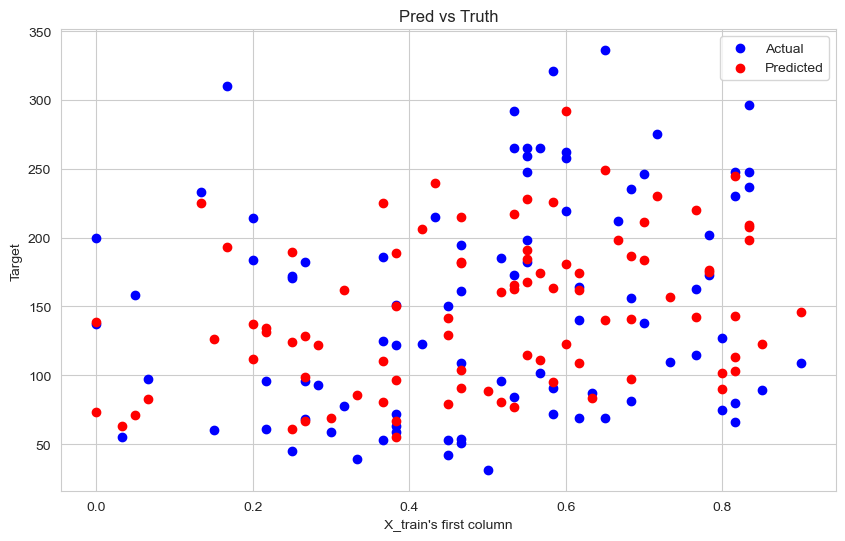

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')

plt.xlabel('X_train\'s first column')
plt.ylabel('Target')
plt.title('Pred vs Truth')

plt.legend()
plt.show()

## 회고 정리
- gradient descent 직접 구현하는 게 생각보다 함수를 나누는 것이 어려웠다. 클래스를 통해 구현해보고 싶다.
- 선형 회귀로는 한계가 있는 것 같다
- 생각보다 feature engineering을 열심히 한다고 성능이 많이 높아지지는 않는 것 같아서 아쉽다.